In [1]:
# Core libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [2]:
# Dataset with SAT, GPA, Research and Dartmouth as University
data = pd.DataFrame({
    "SAT": [1200, 1250, 1300, 1350, 1400, 1450, 1280, 1320],
    "GPA": [3.0, 3.2, 3.5, 3.6, 3.8, 3.9, 3.4, 3.7],
    "Research": [0, 0, 1, 0, 1, 1, 0, 1],
    "University": ["Dartmouth"]*8,
    "Chance": [0.55, 0.60, 0.70, 0.75, 0.85, 0.90, 0.65, 0.80]
})

data.head()


,SAT,GPA,Research,University,Chance
0,1200,3.0,0,Dartmouth,0.55
1,1250,3.2,0,Dartmouth,0.60
2,1300,3.5,1,Dartmouth,0.70
3,1350,3.6,0,Dartmouth,0.75
4,1400,3.8,1,Dartmouth,0.85


In [3]:
# One-hot encoding for University column
X = pd.get_dummies(data.drop("Chance", axis=1), columns=["University"])
y = data["Chance"]

X.head(), y.head()


(    SAT  GPA  Research  University_Dartmouth
 0  1200  3.0         0                  True
 1  1250  3.2         0                  True
 2  1300  3.5         1                  True
 3  1350  3.6         0                  True
 4  1400  3.8         1                  True,
 0    0.55
 1    0.60
 2    0.70
 3    0.75
 4    0.85
 Name: Chance, dtype: float64)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape


((6, 4), (2, 4))

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


In [6]:
predictions = model.predict(X_test)
predictions


array([0.60567452, 0.88972163])

In [7]:
score = r2_score(y_test, predictions)
print(f"R² Score: {score:.3f}")


R² Score: 0.997


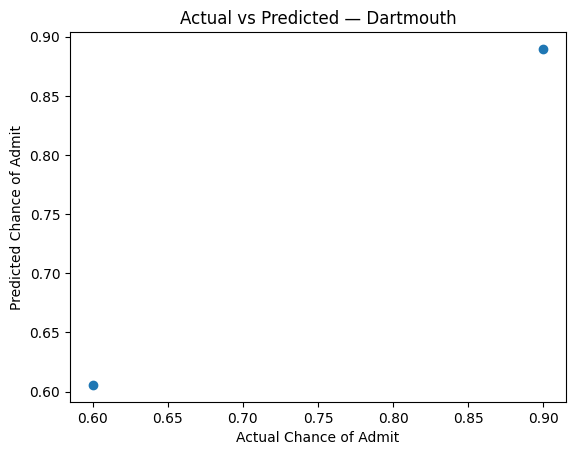

In [8]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted — Dartmouth")
plt.show()


In [9]:
# Your profile input
my_profile = pd.DataFrame({
    "SAT": [1360],            # Your SAT
    "GPA": [3.74],            # Your GPA
    "Research": [1],          # 1 = AI project/initiative
    "University_Dartmouth": [1]  # One-hot for Dartmouth
})

# Predict
chance = model.predict(my_profile)
chance_percent = chance[0]*100

print("==========================================")
print(f"💡 Based on this AI model, my predicted chance of admission at Dartmouth is: {chance_percent:.1f}%")
print("This prediction is calculated using my own profile and manually created dataset.")
print("==========================================")


💡 Based on this AI model, my predicted chance of admission at Dartmouth is: 81.0%
This prediction is calculated using my own profile and manually created dataset.


# Notes
- Dataset is manually created for demonstration purposes.
- Model demonstrates a complete machine learning workflow: data → train/test split → prediction → evaluation.
- The Dartmouth notebook predicts admission chances specifically for Dartmouth University using SAT, GPA, and research experience.
- The generic notebook demonstrates the same workflow without a university-specific focus.
- Small dataset limits generalizability; the purpose is to showcase initiative, understanding of machine learning concepts, and practical implementation skills.
